<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_2_8)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_-2.8'

In [4]:
os.listdir(base_path)

['data_add_delta_-2.8_n20.csv',
 'data_add_delta_-2.8_n30.csv',
 'data_add_delta_-2.8_n60.csv',
 'data_add_delta_-2.8_n120.csv',
 'data_add_delta_-2.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2.8_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,27.139785,54.698184,65.079091,-1.298342e-05,156.917047,156.917083,-0.000037
1,0.0,1.0,55.140692,43.377759,48.308439,3.945040e-05,156.826930,156.826924,0.000006
2,0.0,2.0,84.577149,81.103948,25.445608,2.554329e-06,201.126708,201.126707,0.000001
3,0.0,3.0,57.154513,83.918274,26.311947,-3.675687e-06,177.384730,177.384743,-0.000013
4,0.0,4.0,96.196912,50.596584,40.617636,-6.841909e-07,197.411131,197.411148,-0.000016
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,75.777836,36.442166,78.048628,-1.308488e-05,200.268617,200.268607,0.000010
59996,999.0,56.0,85.155514,55.295210,27.518902,-7.038402e-07,177.969626,177.969629,-0.000004
59997,999.0,57.0,94.501933,65.308142,60.723304,8.693830e-06,230.533388,230.533376,0.000013
59998,999.0,58.0,47.268400,26.976587,52.831809,3.272004e-05,137.076828,137.076776,0.000052


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,27.139785,54.698184,65.079091,-1.298342e-05,156.917047,156.917083,-0.000037
1,0.0,1.0,55.140692,43.377759,48.308439,3.945040e-05,156.826930,156.826924,0.000006
2,0.0,2.0,84.577149,81.103948,25.445608,2.554329e-06,201.126708,201.126707,0.000001
3,0.0,3.0,57.154513,83.918274,26.311947,-3.675687e-06,177.384730,177.384743,-0.000013
4,0.0,4.0,96.196912,50.596584,40.617636,-6.841909e-07,197.411131,197.411148,-0.000016
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,75.777836,36.442166,78.048628,-1.308488e-05,200.268617,200.268607,0.000010
59996,999.0,56.0,85.155514,55.295210,27.518902,-7.038402e-07,177.969626,177.969629,-0.000004
59997,999.0,57.0,94.501933,65.308142,60.723304,8.693830e-06,230.533388,230.533376,0.000013
59998,999.0,58.0,47.268400,26.976587,52.831809,3.272004e-05,137.076828,137.076776,0.000052


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    27.139785  54.698184  65.079091  ...  156.917047  156.917083 -0.000037
      1.0    55.140692  43.377759  48.308439  ...  156.826930  156.826924  0.000006
      2.0    84.577149  81.103948  25.445608  ...  201.126708  201.126707  0.000001
      3.0    57.154513  83.918274  26.311947  ...  177.384730  177.384743 -0.000013
      4.0    96.196912  50.596584  40.617636  ...  197.411131  197.411148 -0.000016
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   75.777836  36.442166  78.048628  ...  200.268617  200.268607  0.000010
      56.0   85.155514  55.295210  27.518902  ...  177.969626  177.969629 -0.000004
      57.0   94.501933  65.308142  60.723304  ...  230.533388  230.533376  0.000013
      58.0   47.268400  26.976587  52.831809  ...  137.076828  137.076776  0.000052
      59.0   61.368151  84.768305  67.406859  ...  223.543314  223.543317 -0.000003

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    27.139785  54.698184  65.079091  ...  156.917047  156.917083 -0.000037
      1.0    55.140692  43.377759  48.308439  ...  156.826930  156.826924  0.000006
      2.0    84.577149  81.103948  25.445608  ...  201.126708  201.126707  0.000001
      3.0    57.154513  83.918274  26.311947  ...  177.384730  177.384743 -0.000013
      4.0    96.196912  50.596584  40.617636  ...  197.411131  197.411148 -0.000016
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   75.777836  36.442166  78.048628  ...  200.268617  200.268607  0.000010
      56.0   85.155514  55.295210  27.518902  ...  177.969626  177.969629 -0.000004
      57.0   94.501933  65.308142  60.723304  ...  230.533388  230.533376  0.000013
      58.0   47.268400  26.976587  52.831809  ...  137.076828  137.076776  0.000052
      59.0   61.368151  84.768305  67.406859  ...  223.543314  223.543317 -0.000003

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,27.139785,54.698184,65.079091,-1.298342e-05,156.917047,156.917083,-0.000037
1,0.0,1.0,55.140692,43.377759,48.308439,3.945040e-05,156.826930,156.826924,0.000006
2,0.0,2.0,84.577149,81.103948,25.445608,2.554329e-06,201.126708,201.126707,0.000001
3,0.0,3.0,57.154513,83.918274,26.311947,-3.675687e-06,177.384730,177.384743,-0.000013
4,0.0,4.0,96.196912,50.596584,40.617636,-6.841909e-07,197.411131,197.411148,-0.000016
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,75.777836,36.442166,78.048628,-1.308488e-05,200.268617,200.268607,0.000010
59996,999.0,56.0,85.155514,55.295210,27.518902,-7.038402e-07,177.969626,177.969629,-0.000004
59997,999.0,57.0,94.501933,65.308142,60.723304,8.693830e-06,230.533388,230.533376,0.000013
59998,999.0,58.0,47.268400,26.976587,52.831809,3.272004e-05,137.076828,137.076776,0.000052


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    27.139785  54.698184  65.079091  ...  156.917047  156.917083 -0.000037
      1.0    55.140692  43.377759  48.308439  ...  156.826930  156.826924  0.000006
      2.0    84.577149  81.103948  25.445608  ...  201.126708  201.126707  0.000001
      3.0    57.154513  83.918274  26.311947  ...  177.384730  177.384743 -0.000013
      4.0    96.196912  50.596584  40.617636  ...  197.411131  197.411148 -0.000016
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   75.777836  36.442166  78.048628  ...  200.268617  200.268607  0.000010
      56.0   85.155514  55.295210  27.518902  ...  177.969626  177.969629 -0.000004
      57.0   94.501933  65.308142  60.723304  ...  230.533388  230.533376  0.000013
      58.0   47.268400  26.976587  52.831809  ...  137.076828  137.076776  0.000052
      59.0   61.368151  84.768305  67.406859  ...  223.543314  223.543317 -0.000003

[60000 rows x 7 columns]

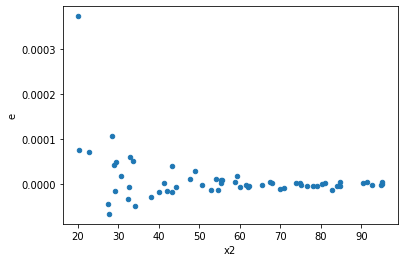

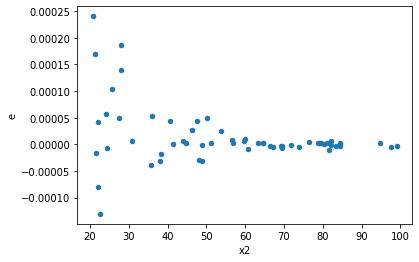

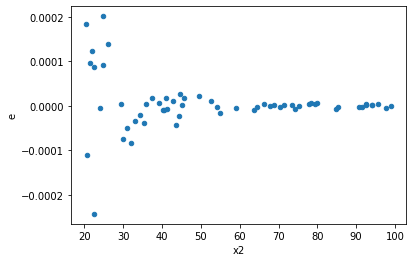

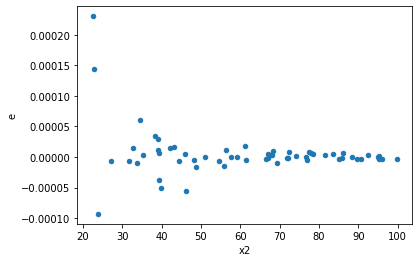

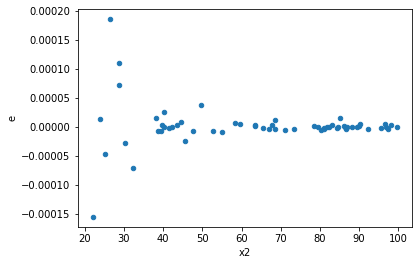

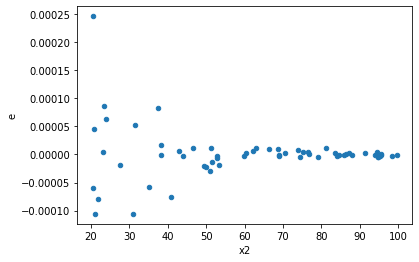

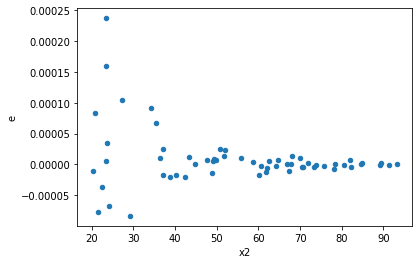

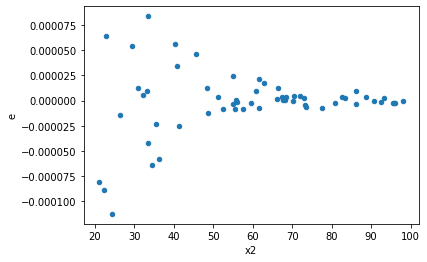

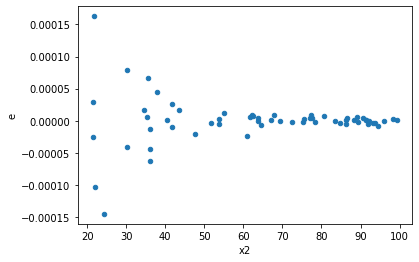

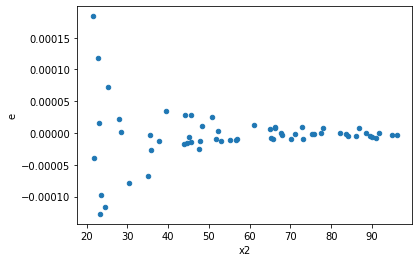

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,3.931188908835581e-10,9.397710048646301e-08,1.9655944544177905e-11,4.6988550243231505e-09,0.004183134921684301,3.534318917174293e-20,Reject001=0 : Heteroscedasticity
1.0,21.0,21.0,3.911741984210199e-10,1.5067297907179932e-07,1.9558709921050994e-11,7.533648953589967e-09,0.0025961801567261503,2.433430380403528e-22,Reject001=0 : Heteroscedasticity
2.0,21.0,21.0,3.1840042994719533e-10,1.8470635127422458e-07,1.5920021497359767e-11,9.235317563711229e-09,0.0017238196074507563,3.358264390588315e-24,Reject001=0 : Heteroscedasticity
3.0,21.0,21.0,3.336889796108548e-10,7.542743369509076e-08,1.668444898054274e-11,3.771371684754538e-09,0.004423973656054179,6.332443609871774e-20,Reject001=0 : Heteroscedasticity
4.0,21.0,21.0,3.3569457382693006e-10,7.347144376165323e-08,1.6784728691346504e-11,3.6735721880826617e-09,0.004569048281070234,8.861511409586097e-20,Reject001=0 : Heteroscedasticity
5.0,21.0,21.0,2.9976205787201106e-10,1.1973919660039986e-07,1.4988102893600554e-11,5.986959830019993e-09,0.0025034580687257595,1.663974409787521e-22,Reject001=0 : Heteroscedasticity
6.0,21.0,21.0,6.284444996630318e-10,1.1965775287275358e-07,3.142222498315159e-11,5.9828876436376786e-09,0.005252016560358877,3.7766247510758146e-19,Reject001=0 : Heteroscedasticity
7.0,21.0,21.0,3.230253401853167e-10,4.69361251639995e-08,1.6151267009265833e-11,2.346806258199975e-09,0.006882232801634859,6.256773984633431e-18,Reject001=0 : Heteroscedasticity
8.0,21.0,21.0,3.1604343931621295e-10,6.592372374116458e-08,1.5802171965810648e-11,3.296186187058229e-09,0.004794077478952646,1.461759510923559e-19,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64